In [13]:
import pandas as pd

In [30]:
df = pd.read_csv('full_df.csv')

In [31]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [17]:
import seaborn as sns
sns.set(style="whitegrid")


In [18]:
import ast


labels_order = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
df['labels'] = df['labels'].str.extract(r"\['([A-Z])'\]")
df['target'] = df['target'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['target_index'] = df['target'].apply(lambda x: x.index(1))

df['expected_label'] = df['target_index'].apply(lambda i: labels_order[i])

df['match'] = df['labels'] == df['expected_label']

Visualizations to understand the data better

C:\Users\HP\AppData\Local\Temp\ipykernel_1300\2666045018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='labels', data=df, order=labels_order, palette='Set2')


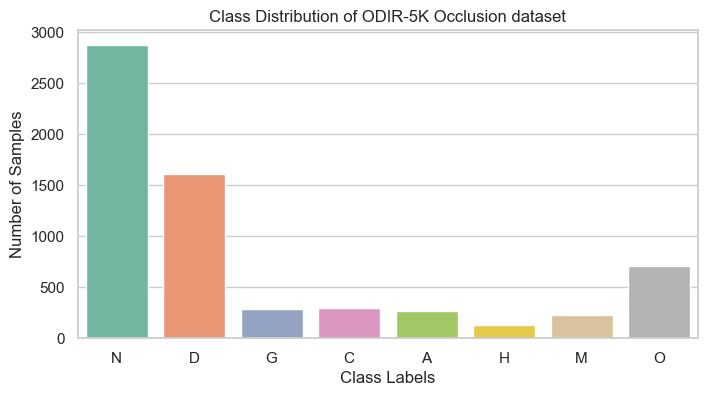

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.countplot(x='labels', data=df, order=labels_order, palette='Set2')
plt.title('Class Distribution of ODIR-5K Occlusion dataset')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_1300\66421979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='labels', y='Patient Age', data=df, order=labels_order, palette='Set3')


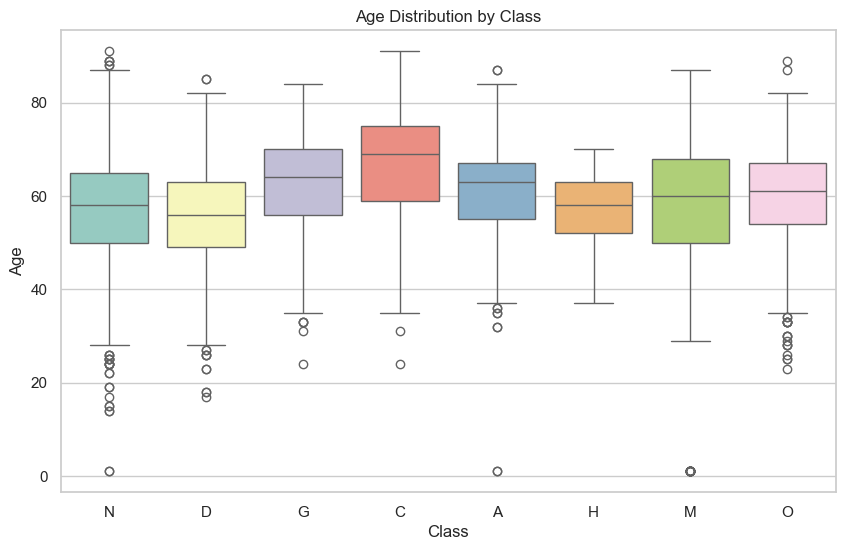

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='labels', y='Patient Age', data=df, order=labels_order, palette='Set3')
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

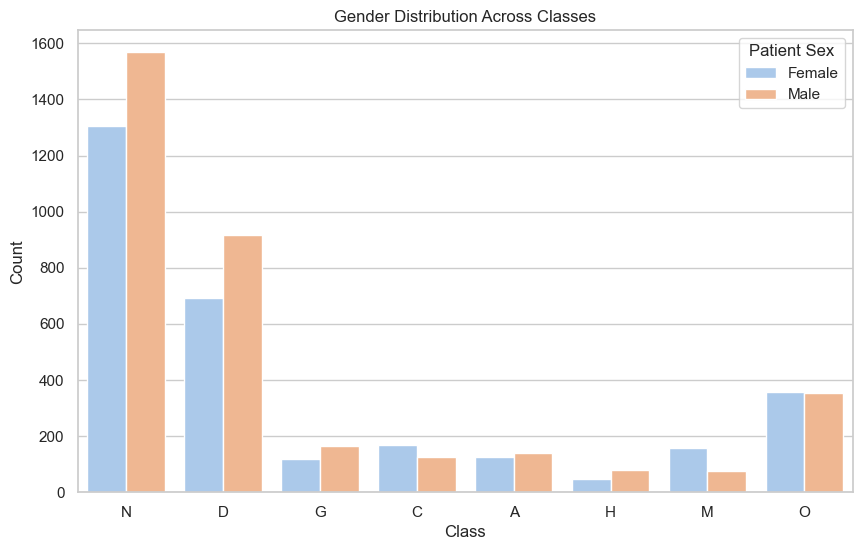

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='labels', hue='Patient Sex', data=df, order=labels_order, palette='pastel')
plt.title('Gender Distribution Across Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Flattening images from high dimensional data to low dimensional data. 
Flattening is carried out bcoz the algorithms like SVM expects the data to be input in the form of (sample X features) where sample = no of rows and features is the no of columns.

In [ ]:
from PIL import Image
import numpy as np
import os

image_folder = 'preprocessed_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Looping the files inside the preprocessed_images folder
for idx, file in enumerate(image_files):
    print(file)
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')  
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten() 
    print(flat_vector)   # input data (features) which is X for the algorithm


0_left.jpg
[0 0 0 ... 0 0 0]
0_right.jpg
[0 0 0 ... 0 0 0]
1005_right.jpg
[0 0 0 ... 0 0 0]
1006_left.jpg
[0 0 0 ... 0 0 0]
1006_right.jpg
[0 0 0 ... 0 0 0]
1008_left.jpg
[0 0 0 ... 0 0 0]
1008_right.jpg
[0 0 0 ... 0 0 0]
100_left.jpg
[0 0 0 ... 0 0 0]
100_right.jpg
[0 0 0 ... 0 0 0]
1010_left.jpg
[0 0 0 ... 0 0 0]
1010_right.jpg
[0 0 0 ... 0 0 0]
1011_left.jpg
[0 0 0 ... 0 0 0]
1011_right.jpg
[0 0 0 ... 0 0 0]
1012_left.jpg
[0 0 0 ... 0 0 0]
1012_right.jpg
[0 0 0 ... 0 0 0]
1013_left.jpg
[0 0 0 ... 0 0 0]
1013_right.jpg
[0 0 0 ... 0 0 0]
1014_right.jpg
[0 0 0 ... 0 0 0]
1015_left.jpg
[0 0 0 ... 0 0 0]
1015_right.jpg
[0 0 0 ... 0 0 0]
1016_left.jpg
[0 0 0 ... 0 0 0]
1016_right.jpg
[0 0 0 ... 0 0 0]
1018_right.jpg
[0 0 0 ... 0 0 0]
1019_left.jpg
[0 0 0 ... 0 0 0]
1019_right.jpg
[0 0 0 ... 0 0 0]
101_left.jpg
[0 0 0 ... 0 0 0]
101_right.jpg
[0 0 0 ... 0 0 0]
1020_left.jpg
[0 0 0 ... 0 0 0]
1021_left.jpg
[0 0 0 ... 0 0 0]
1021_right.jpg
[0 0 0 ... 0 0 0]
1022_left.jpg
[0 0 0 ... 0 0 0]
10

Number of Normal and Abnormal Images in the dataset

In [38]:
import ast
x1 = 0
x2 = 0
for value in df['target']:
    if value == 1:
        x1 = x1+1  
    else:
        x2= x2+1

print("Number of Normal Images:", x1)
print("Number of Abnormal Images:", x2)


Number of Normal Images: 2873
Number of Abnormal Images: 3519


Adding a new column in the dataframe "input_data" and adding feature vector for each file by mapping the name of the file in the folder with the name of the file in data frame

In [ ]:
from PIL import Image
import numpy as np
import os

image_folder = 'preprocessed_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_data'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')  
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten() 
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_data'] = flat_vector
df


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,input_data
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
# Cross- Checking
file = '0_left.jpg'
mask = file == df['filename']
if mask.any():
    print(df[mask])

      ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
3194   0           69      Female  0_left.jpg  0_right.jpg   

     Left-Diagnostic Keywords Right-Diagnostic Keywords  N  D  G  C  A  H  M  \
3194                 cataract             normal fundus  0  0  0  1  0  0  0   

      O                                           filepath labels  target  \
3194  0  ../input/ocular-disease-recognition-odir5k/ODI...  ['C']       0   

        filename                                         input_data  
3194  0_left.jpg  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  


Transform the Target column of the dataframe from multiclass classification labels to binary classes classification (0 or 1)

In [ ]:
import ast

clean_targets = []    # initializing the empty list
for value in df['target']:
    if isinstance(value, str):
        value = ast.literal_eval(value)    # converting str to real numbers indicating "[1,0,0]" -> [1,0,0]
    clean_targets.append(value)
df['target'] = clean_targets       # every row in the column target in the dataframe has value for eg. [0,0,1]

# Convert list to single value 1 or 0
new_targets = []  
for value in df['target']:   # each value is a list now
    first_element = value[0]   # extracting the first element of every list

    if first_element == 1:
        new_targets.append('1')   
    else:
        new_targets.append('0')

df['target'] = new_targets


In [35]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg


Splitting the Dataset